# Statistical Analysis Question 4

This notebook investigates wether students of different levels find different aspects of writing an essay easier than others. I.e. How does the distribution of the scoring-categories differ for different final grades?*

## Key Findings

Grammar & Accuracy is consistently the most challenging component across nearly all band levels, while Task Achievement tends to be the least challenging for most students.

## Imports and Setup

---

In [1]:
import pandas as pd
import numpy as np
from os import path
import sys
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(path.dirname(path.abspath("")))
project_root = path.dirname(path.abspath(""))
print(project_root)

/Users/finnferchau/dev/team-10


In [2]:
pd.options.plotting.backend = "plotly"

# show the first 200 characters per attribute, None shows all
pd.set_option("max_colwidth", 500)

## Data Import

---

Load the clustered essay dataset, which contains essays, their associated prompts, scores, and cluster assignments.

In [3]:
csv_file = "/data/clean_clustered_train.csv"
csv_file_path = project_root + csv_file
print(csv_file_path)

df = pd.read_csv(csv_file_path)
df.sample(5)

/Users/finnferchau/dev/team-10/data/clean_clustered_train.csv


,prompt,essay,evaluation,band_score_old,task_achievement_description,task_achievement_score,coherence_and_cohesion_description,coherence_and_cohesion_score,lexical_resource_description,lexical_resource_score,grammatical_range_and_accuracy_description,grammatical_range_and_accuracy_score,overall_band_score_description,band_score,cluster
1387,"some people believe that studying at university or college is the best route to a successful career, while others believe that it is better to get a job straight after school. Discuss both views and give your opinion.","It is an ongoing argument where individuals think that having a higher education is the most ideal path to being a success. Others do not agree with this view, they are of the opinion that it is more beneficial to gain employment right after they complete high school. I concur with the second group, this essay will discuss both ideas and additionally why I hold this particular view. Firstly, the importance of attending a college cannot be gainsaid. Students in this institution dedicate at le...","### Task Achievement:\n- The candidate has adequately addressed the given task by discussing both views on the topic and providing their own opinion.\n- The ideas presented are clear, relevant to the task, and coherent, with each paragraph focusing on a specific aspect of the discussion.\n- All aspects of the task have been covered, with arguments and evidence provided to support each view.\n- Overall, the candidate has effectively fulfilled the requirements of the task.\n- Suggested Band Sc...",8\r\r\r\r\r\r\r\r\r,"Task Achievement: - The candidate has adequately addressed the given task by discussing both views on the topic and providing their own opinion. - The ideas presented are clear, relevant to the task, and coherent, with each paragraph focusing on a specific aspect of the discussion. - All aspects of the task have been covered, with arguments and evidence provided to support each view. - Overall, the candidate has effectively fulfilled the requirements of the task. - Suggested Band Score: 8 ###",8.0,"Coherence and Cohesion: - The essay is well-organized, with clear transitions between sentences and paragraphs. - Connecting words and phrases are effectively used to maintain a smooth progression of ideas. - The logical sequence and arrangement of information throughout the essay are maintained. - However, there is a minor lack of coherence in the conclusion, which could be improved by restating the main points of the discussion and reinforcing the candidate's opinion. - Suggested Band Scor...",7.5,"Lexical Resource (Vocabulary): - The candidate demonstrates a good range of vocabulary, but there are some inaccuracies and overuse of certain words. - For example, ""gainsaid"" is an uncommon word that may not be familiar to all readers, and ""organized institutions"" is a somewhat vague term. - The candidate could benefit from using more precise and varied vocabulary, such as ""undeniable"" instead of ""gainsaid"" and ""educational institutions"" instead of ""organized institutions."" - Overall, the c...",7.0,"Grammatical Range and Accuracy: - The candidate demonstrates a good range of sentence structures, but there are some grammatical errors. - For example, ""It gives young folks the opportunity to grow and gain practical skills"" should be ""It gives young people the opportunity to grow and gain practical skills."" - Additionally, there is a lack of variety in sentence structure, with most sentences following a simple subject-verb-object pattern. - The candidate could benefit from using more comple...",7.0,"Overall Band Score: - Considering the holistic performance across all criteria, the essay receives an overall band score of 8. - The essay effectively addresses the task, presents clear and coherent ideas, demonstrates a good range of vocabulary (with some inaccuracies), and has a generally good grammatical structure (with some errors). - Overall, the essay meets the requ

## First Lets look at the Band Score Distribution Overall

---

In [4]:
# Create a frequency count of band scores
band_counts = df["band_score"].value_counts().sort_index()

# Get some basic statistics
print(f"Mean band score: {df['band_score'].mean():.2f}")
print(f"Median band score: {df['band_score'].median():.2f}")
print(f"Min band score: {df['band_score'].min():.2f}")
print(f"Max band score: {df['band_score'].max():.2f}")

Mean band score: 6.25
Median band score: 6.50
Min band score: 4.00
Max band score: 8.50


In [5]:
band_counts.plot(kind="bar")

## Lets look at the sub-scoring distribution overall

---

In [6]:
df.describe()

,task_achievement_score,coherence_and_cohesion_score,lexical_resource_score,grammatical_range_and_accuracy_score,band_score,cluster
count,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000,9048.000000
mean,6.122016,5.962588,5.664511,5.580018,6.247955,12.585102
std,1.387875,1.536109,1.436100,1.498869,1.225668,8.356636
min,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000
25%,5.500000,5.000000,5.000000,5.000000,5.500000,5.000000
50%,6.500000,6.000000,6.000000,6.000000,6.500000,11.000000
75%,7.000000,7.000000,6.500000,6.500000,7.000000,20.000000
max,9.000000,9.000000,8.500000,8.500000,8.500000,29.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   prompt                                      9048 non-null   object 
 1   essay                                       9048 non-null   object 
 2   evaluation                                  9048 non-null   object 
 3   band_score_old                              9048 non-null   object 
 4   task_achievement_description                9048 non-null   object 
 5   task_achievement_score                      9048 non-null   float64
 6   coherence_and_cohesion_description          9048 non-null   object 
 7   coherence_and_cohesion_score                9048 non-null   float64
 8   lexical_resource_description                9048 non-null   object 
 9   lexical_resource_score                      9048 non-null   float64
 10  grammatical_

In [8]:
def plot_subscore_distributions(df, combined=False, figsize=(15, 10)):
    """
    Plot the distributions of the four subscoring components.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the scoring data
    combined : bool, default=False
        If True, plot all distributions in a single figure with subplots
        If False, return separate plots for each component
    figsize : tuple, default=(15, 10)
        Figure size when combined=True
    """
    subscore_columns = [
        "task_achievement_score",
        "coherence_and_cohesion_score",
        "lexical_resource_score",
        "grammatical_range_and_accuracy_score",
    ]

    pretty_names = {
        "task_achievement_score": "Task Achievement",
        "coherence_and_cohesion_score": "Coherence & Cohesion",
        "lexical_resource_score": "Lexical Resource",
        "grammatical_range_and_accuracy_score": "Grammar & Accuracy",
    }

    if combined:
        # Create a single figure with 4 subplots
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        axes = axes.flatten()

        for i, col in enumerate(subscore_columns):
            # Count frequencies
            counts = df[col].value_counts().sort_index()

            # Create bar plot
            axes[i].bar(counts.index, counts.values, color="skyblue")
            axes[i].set_title(f"Distribution of {pretty_names[col]}")
            axes[i].set_xlabel("Score")
            axes[i].set_ylabel("Frequency")
            axes[i].grid(axis="y", linestyle="--", alpha=0.7)

            # Add count labels on top of each bar
            for j, v in enumerate(counts.values):
                axes[i].text(counts.index[j], v + 20, str(v), ha="center")

            # Calculate and display statistics
            mean = df[col].mean()
            median = df[col].median()
            axes[i].axvline(
                mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}"
            )
            axes[i].axvline(
                median, color="green", linestyle="-.", label=f"Median: {median:.2f}"
            )
            axes[i].legend()

        plt.tight_layout()
        plt.show()

    else:
        # Create separate plots for each column
        for col in subscore_columns:
            plt.figure(figsize=(10, 6))

            # Count frequencies
            counts = df[col].value_counts().sort_index()

            # Create bar plot
            plt.bar(counts.index, counts.values, color="skyblue")
            plt.title(f"Distribution of {pretty_names[col]}")
            plt.xlabel("Score")
            plt.ylabel("Frequency")
            plt.grid(axis="y", linestyle="--", alpha=0.7)

            # Add count labels on top of each bar
            for i, v in enumerate(counts.values):
                plt.text(counts.index[i], v + 20, str(v), ha="center")

            # Calculate and display statistics
            mean = df[col].mean()
            median = df[col].median()
            plt.axvline(mean, color="red", linestyle="--", label=f"Mean: {mean:.2f}")
            plt.axvline(
                median, color="green", linestyle="-.", label=f"Median: {median:.2f}"
            )
            plt.legend()

            plt.tight_layout()
            plt.show()

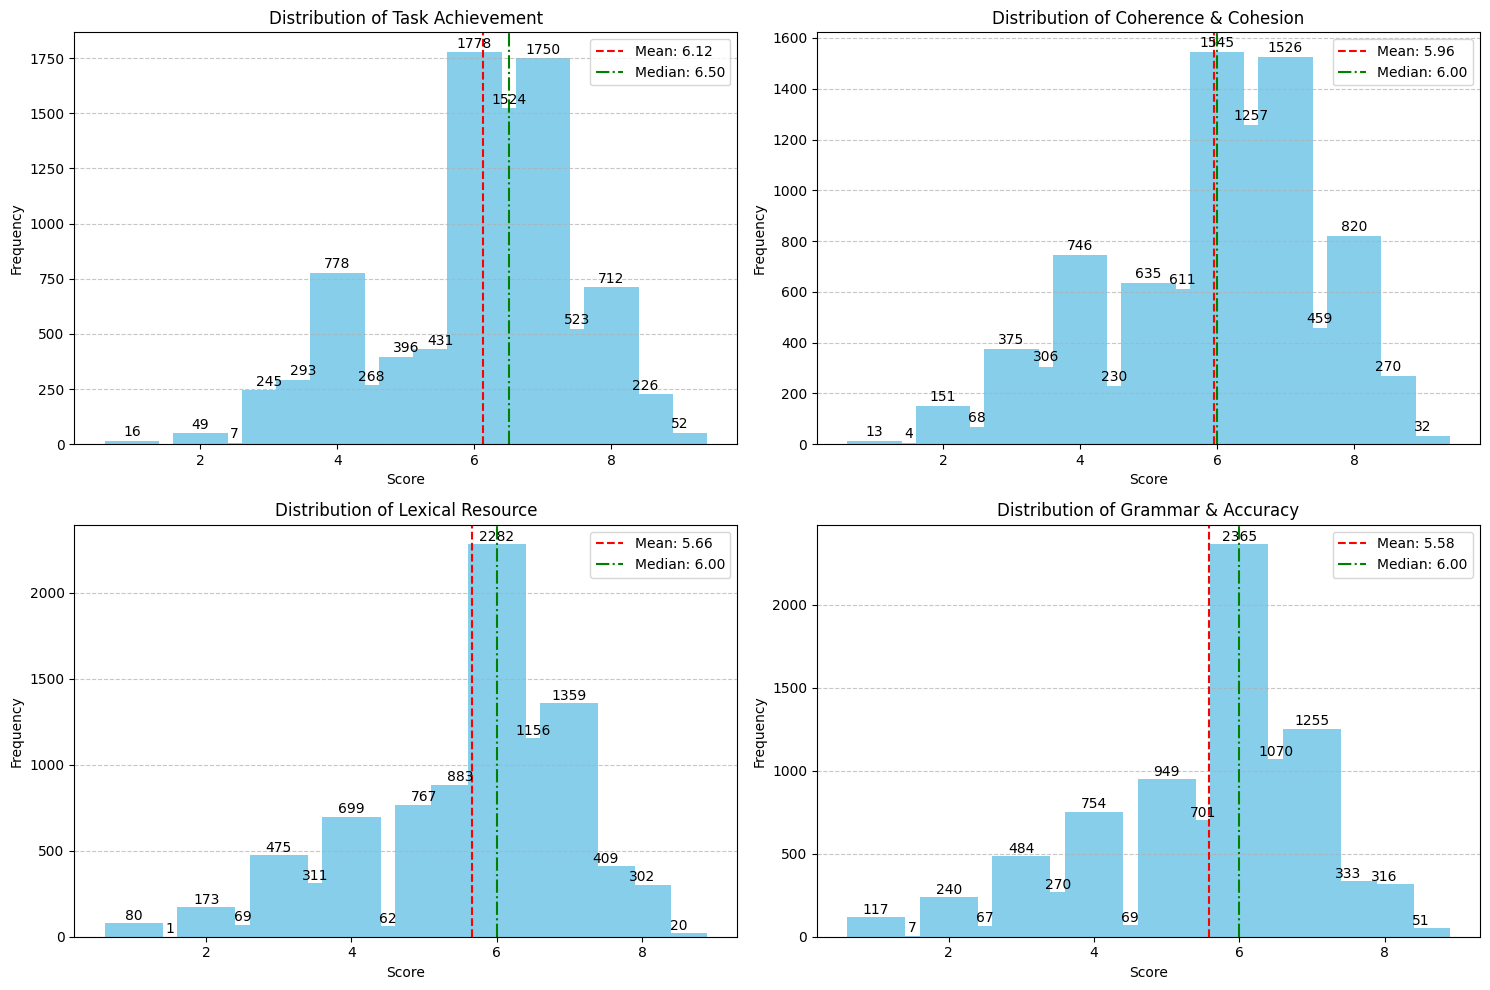

In [9]:
plot_subscore_distributions(df, combined=True)

### Lets also look at the std. deviation overall

In [10]:
subscore_columns = [
    "task_achievement_score",
    "coherence_and_cohesion_score",
    "lexical_resource_score",
    "grammatical_range_and_accuracy_score",
]

pretty_names = {
    "task_achievement_score": "Task Achievement",
    "coherence_and_cohesion_score": "Coherence & Cohesion",
    "lexical_resource_score": "Lexical Resource",
    "grammatical_range_and_accuracy_score": "Grammar & Accuracy",
}

print("Std. Deviations:")
for col in subscore_columns:
    print(f"{pretty_names[col]}: {np.std(df[col])}")

Std. Deviations:
Task Achievement: 1.3877979057327046
Coherence & Cohesion: 1.5360243192957475
Lexical Resource: 1.436020396828196
Grammar & Accuracy: 1.4987862462302242


## Now, lets look at the distributions for each overall score seperately

---

In [11]:
def plot_subscore_comparison_bar(df, figsize=(12, 8)):
    """
    Create a bar plot showing subscores by band level with a summary of the
    most challenging components.

    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the band scores and subscores
    normalized : bool, default=False
        If True, show differences between subscores and band score
        If False, show raw subscores
    figsize : tuple, default=(12, 8)
        Figure size
    """
    # Define the subscore columns
    subscore_columns = [
        "task_achievement_score",
        "coherence_and_cohesion_score",
        "lexical_resource_score",
        "grammatical_range_and_accuracy_score",
    ]

    # Create a shorter, cleaner label for each column
    pretty_names = {
        "task_achievement_score": "Task Achievement",
        "coherence_and_cohesion_score": "Coherence & Cohesion",
        "lexical_resource_score": "Lexical Resource",
        "grammatical_range_and_accuracy_score": "Grammar & Accuracy",
    }

    # Group by band score and calculate the average of each subscore
    grouped = df.groupby("band_score")[subscore_columns].mean().reset_index()

    # Melt the data for easier plotting
    plot_data = pd.melt(
        grouped,
        id_vars=["band_score"],
        value_vars=subscore_columns,
        var_name="Subscore",
        value_name="Score",
    )

    # Clean up the subscore names for display
    plot_data["Subscore"] = plot_data["Subscore"].apply(lambda x: pretty_names[x])

    # Create a grouped bar chart
    plt.figure(figsize=figsize)
    sns.barplot(x="band_score", y="Score", hue="Subscore", data=plot_data)

    # Add a reference line for the band score
    for x, band in enumerate(sorted(grouped["band_score"].unique())):
        plt.plot([x - 0.4, x + 0.4], [band, band], "k--", alpha=0.5)

    plt.title("Average Subscores by Band Level")
    plt.xlabel("Overall Band Score")
    plt.ylabel("Average Subscore")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.legend(title="Scoring Component", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # Calculate and display the subscore that's most difficult at each band level
    diff_data = grouped.copy()
    for col in subscore_columns:
        diff_data[f"{col}_diff"] = diff_data[col] - diff_data["band_score"]

    print("Most challenging components at each band level:")
    print("==============================================")

    for _, row in diff_data.iterrows():
        band = row["band_score"]
        diff_cols = {col: row[f"{col}_diff"] for col in subscore_columns}
        hardest = min(diff_cols.items(), key=lambda x: x[1])
        easiest = max(diff_cols.items(), key=lambda x: x[1])

        print(f"Band {band}:")
        print(
            f"  Most challenging: {pretty_names[hardest[0]]} ({hardest[1]:.2f} below band)"
        )
        print(
            f"  Least challenging: {pretty_names[easiest[0]]} ({easiest[1]:.2f} {'above' if easiest[1] > 0 else 'below'} band)"
        )
        print()

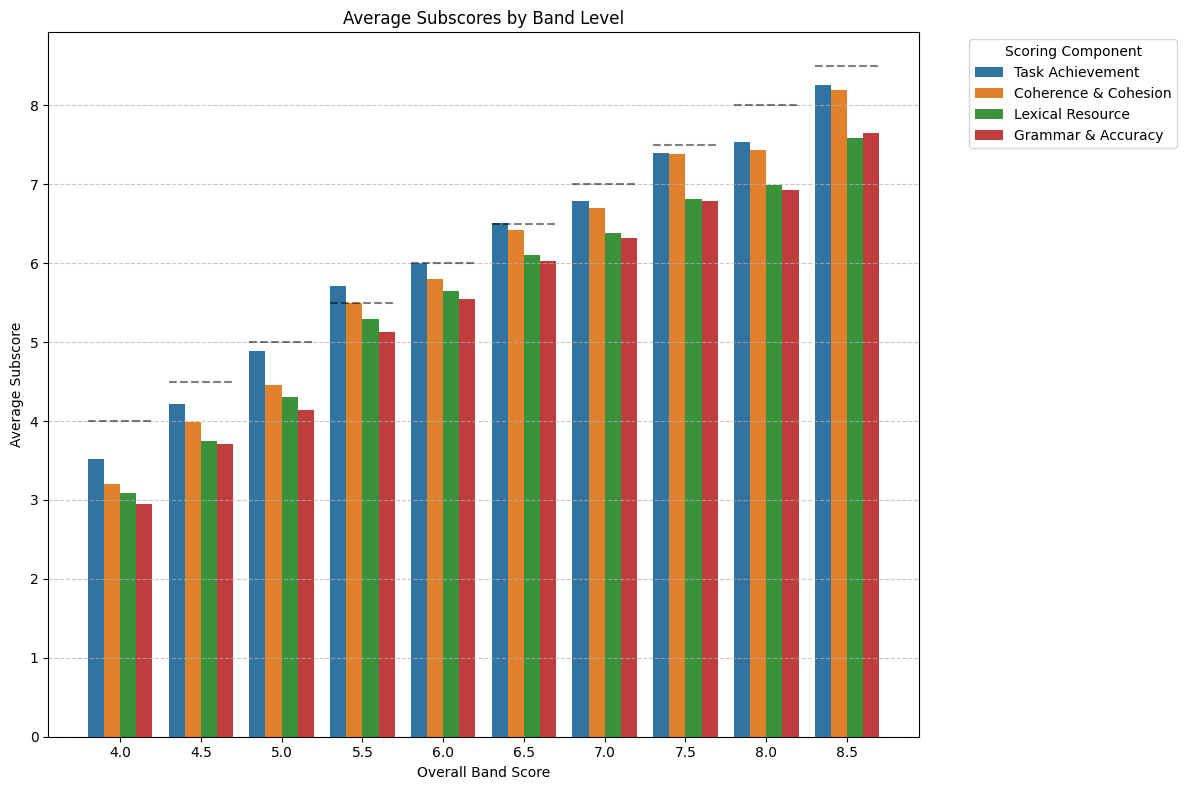

Most challenging components at each band level:
Band 4.0:
  Most challenging: Grammar & Accuracy (-1.05 below band)
  Least challenging: Task Achievement (-0.48 below band)

Band 4.5:
  Most challenging: Grammar & Accuracy (-0.79 below band)
  Least challenging: Task Achievement (-0.29 below band)

Band 5.0:
  Most challenging: Grammar & Accuracy (-0.86 below band)
  Least challenging: Task Achievement (-0.12 below band)

Band 5.5:
  Most challenging: Grammar & Accuracy (-0.38 below band)
  Least challenging: Task Achievement (0.21 above band)

Band 6.0:
  Most challenging: Grammar & Accuracy (-0.45 below band)
  Least challenging: Task Achievement (0.01 above band)

Band 6.5:
  Most challenging: Grammar & Accuracy (-0.47 below band)
  Least challenging: Task Achievement (0.01 above band)

Band 7.0:
  Most challenging: Grammar & Accuracy (-0.68 below band)
  Least challenging: Task Achievement (-0.21 below band)

Band 7.5:
  Most challenging: Grammar & Accuracy (-0.71 below band)
  Lea

In [12]:
plot_subscore_comparison_bar(df)

### [`Click here to go back to the Homepage`](../Homepage.md)